In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import matplotlib.animation as animation

## 得られたjsonの解析

In [35]:
data=pd.read_json("data/data.json")
data

,cost,length,points
0,300.000,0.000,"[[[100, 0], [50, 0], [0, 0]], [[0, 100], [0, 5..."
1,300.000,0.000,"[[[100, 0], [50, 0], [0, 0]], [[0, 100], [0.11..."
2,300.007,0.000,"[[[100, 0], [50, 0], [0, 0]], [[0, 100], [0.11..."
3,300.000,100.000,"[[[100, 0], [50, 0], [0, 0], [0, 0]], [[0, 100..."
4,300.000,200.000,"[[[100, 0], [50, 0], [0, 0], [0, 0]], [[0, 100..."
...,...,...,...
9995,320.711,441.421,"[[[100, 0], [50, 0], [0, 0], [0, 0]], [[0, 100..."
9996,320.711,441.421,"[[[100, 0], [50, 0], [0, 0], [0, 0]], [[0, 100..."
9997,320.711,441.421,"[[[100, 0], [50, 0], [0, 0], [0, 0]], [[0, 100..."
9998,320.711,441.421,"[[[100, 0], [50, 0], [0, 0], [0, 0]], [[0, 100..."


In [36]:
cost=data['cost']
cost[cost>100*(1+3**0.5)].idxmin()

62

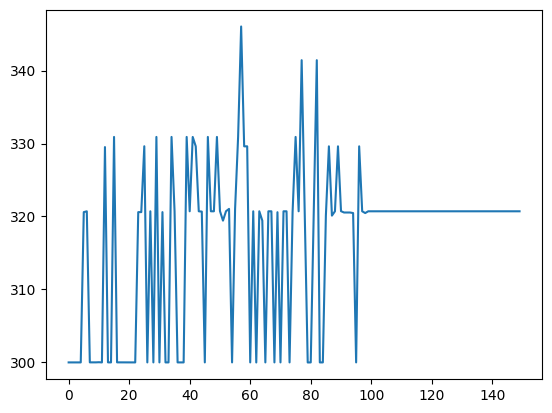

In [43]:
cost[:150].plot()
plt.savefig('best.svg')

In [24]:
uniq=data['points'].drop_duplicates().reset_index(drop=True)
uniq

0     [[[100, 0], [50, 0], [0, 0]], [[0, 100], [0, 5...
1     [[[100, 0], [50, 0], [0, 0]], [[0, 100], [0.11...
2     [[[100, 0], [50, 0], [0, 0]], [[0, 100], [0.11...
3     [[[100, 0], [50, 0], [0, 0], [0, 0]], [[0, 100...
4     [[[100, 0], [50, 0], [0, 0], [0, 0]], [[0, 100...
                            ...                        
57    [[[100, 0], [50, 0], [0, 0], [0, 0], [0, 0]], ...
58    [[[100, 0], [50, 0], [0, 0]], [[0, 100], [0, 5...
59    [[[100, 0], [50, 0], [0, 0], [0, 0], [0, 0]], ...
60    [[[100, 0], [50, 0], [0, 0], [0, 0]], [[0, 100...
61    [[[100, 0], [50, 0], [0, 0]], [[0, 100], [0, 5...
Name: points, Length: 62, dtype: object

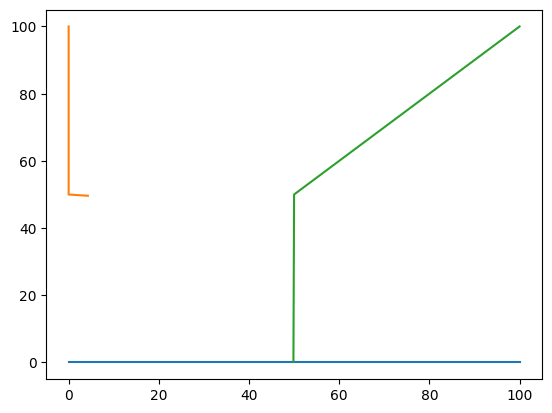

In [34]:
def plotRoute(route):
    for single_route in route:
        tmp=np.array(single_route).T
        plt.plot(tmp[0],tmp[1])
    plt.show()

plotRoute(data['points'][358])
#uniq[9]

MovieWriter stderr:
convert-im6.q16: unexpected end-of-file `-': そのようなファイルやディレクトリはありません @ error/rgb.c/ReadRGBImage/244.
convert-im6.q16: no images defined `animate.gif' @ error/convert.c/ConvertImageCommand/3229.



CalledProcessError: Command '['convert', '-size', '640x480', '-depth', '8', '-delay', '10.0', '-loop', '0', 'rgba:-', 'animate.gif']' returned non-zero exit status 1.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f10f7a1bb50> (for post_execute):


TypeError: 'AxesSubplot' object is not iterable

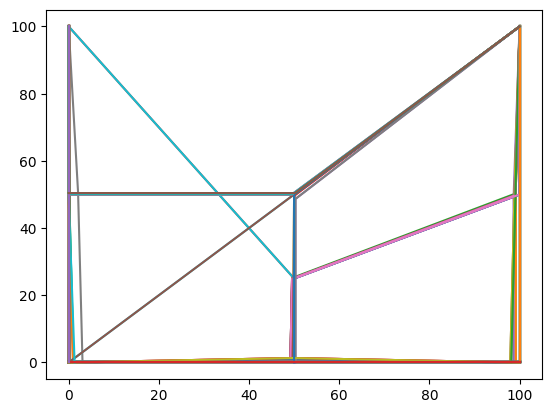

In [26]:
def animate(uniq):
    ims=[]
    fig=plt.figure()
    for points in uniq:
        for single_route in points:
            tmp=np.array(single_route).T
            plt.plot(tmp[0],tmp[1])
        ims.append(plt.gca())
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save('animate.gif',writer='imagemagick')

animate(uniq)

## 4分木アルゴリズムの動作確認

In [10]:
qtree_data=pd.read_csv('data/qtree.csv',header=None)
morton_data=pd.read_csv('data/morton.csv',header=None,delimiter=' ')

<AxesSubplot:xlabel='0', ylabel='1'>

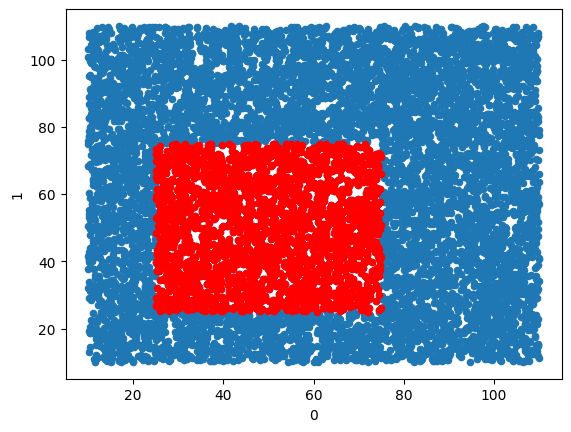

In [11]:
#qtree_data[(abs(qtree_data[0]-50)>25)|(abs(qtree_data[1]-50)>25)].sort_values(0)
#pd.set_option('max_row', None)
# 前のn(今は10000)個を全体のデータとして扱うプロトコル
all_points=qtree_data[0:10000]
researched_points=qtree_data[10000:]
ax=all_points.plot.scatter(x=0,y=1)
researched_points.plot.scatter(x=0,y=1,color='red',ax=ax)
#all_points[(abs(all_points[0]-50)<=50/2)&(abs(all_points[1]-50)<=50/2)].plot.scatter(x=0,y=1,color='green',ax=ax)
#plt.show()

In [27]:
print(researched_points.drop_duplicates().shape)
print(researched_points.shape)

(930, 2)
(930, 2)


In [58]:
morton_data.apply(lambda x:x.apply(lambda y:f'{y:032b}'),axis=1)

,0,1
0,00110000000000000000000000000000,00111111111111111111111111111111
1,01100000000000000000000000000000,01101111111111111111111111111111
2,01110000000000000000000000000000,01111010101010101010101010101010
3,10010000000000000000000000000000,10011111111111111111111111111111
4,10110000000000000000000000000000,10110101010101010101010101010101
5,11000000000000000000000000000000,11001111111111111111111111111111
6,11010000000000000000000000000000,11011010101010101010101010101010
7,11100000000000000000000000000000,11100101010101010101010101010101
8,11110000000000000000000000000000,11110000000000000000000000000000


In [61]:
morton_data.apply(lambda x:x.apply(lambda y:y>>28),axis=1)

,0,1
0,3,3
1,6,6
2,7,7
3,9,9
4,11,11
5,12,12
6,13,13
7,14,14
8,15,15
